In [1]:
import os
import matplotlib.pyplot as plt

import xrmreader
import numpy as np
import h5py

spefile module not found
EdfFile module not found
astropy module not found


In [2]:
projection_data = r'/Volumes/LaCie/DFG_NEAPEL/Thinlayer 1-3_2023-03-30_155044/tomo-HR/Thinlayer 1-3_tomo-HR_recon_aligned.txm'

In [3]:
metadata = xrmreader.read_metadata(projection_data)



Could not find any reference data in metadata.

Could not decode filter information.


In [11]:
for key,item in metadata.items():
    print(key,item)

facility None
image_width 1980
image_height 2026
data_type 5
number_of_images 2010
pixel_size 1.4807668924331665
image_data_type 5
thetas [-2.29258992e-05 -2.29258992e-05 -2.29258992e-05 ... -2.29258992e-05
 -2.29258992e-05 -2.29258992e-05]
x-shifts None
y-shifts None
AMC-x-shifts None
AMC-y-shifts None
temperature-x-shifts None
temperature-y-shifts None
source-x-shifts None
source-y-shifts None
align-mode None
center_shift -8.824000358581543
rotation_angle 0.0
source_isocenter_distance 7031.234375
detector_isocenter_distance 9019.8056640625
cone_angle 11.950371742248535
fan_angle 11.77702522277832
camera_offset 0.0
source_drift None
current 0.0
voltage 0.0
power None
exposure_time None
binning None
filter None
scaling_min -0.37789154052734375
scaling_max 1.2105991840362549
reference None


In [6]:
raw_projections = xrmreader.read_txrm(projection_data)


Could not find any reference data in metadata.

Could not decode filter information.


In [7]:
print(raw_projections.dtype)
print(raw_projections.shape)
print(raw_projections.nbytes/1024**2)
# print(raw_projections.flatten().min(),raw_projections.flatten().max())

float32
(2010, 2026, 1980)
30758.189392089844


In [8]:
raw = raw_projections.astype(np.uint16)

In [10]:
type(metadata)

dict

In [ ]:
with h5py.File(os.path.join(path,"Parallelprobe_train.h5"), 'w') as f:
    for key,item in data.items():
        f.create_dataset(key, data = item)

In [14]:
print(raw.dtype)
print(raw.shape)
print(raw.nbytes/1024**2)

uint16
(2010, 2026, 1980)
15379.094696044922


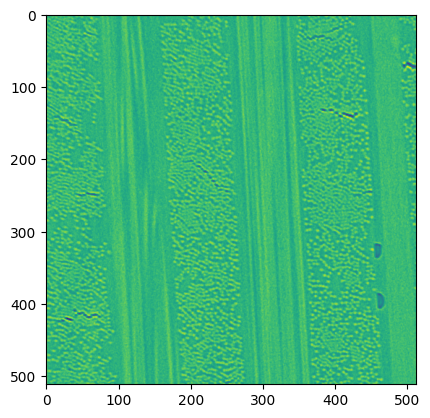

In [24]:
plt.imshow(raw[512,512:1024,512:1024])

In [29]:
with h5py.File("data_test.h5",'w') as h5:
    h5.create_dataset("raw",data=vol)

In [26]:
vol = raw[512:1024,512:1024,512:1024]

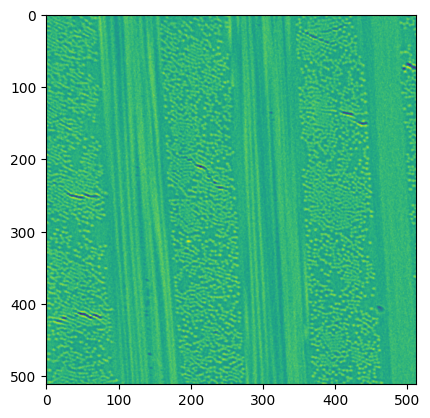

In [28]:
plt.imshow(vol[100,::])